# **Análise de sentimentos | Cielo Gestão - Maquininha**

#### **Introdução**

---

O que as pessoas pensam sobre o aplicativo "Cielo Gestão - Maquininha"? Já imaginou escanear a reação de um montante grande de pessoas e, com isso, acelerar uma tomada de decisão, como uma automação, que tem uma influência direta sobre o negócio? Conseguimos responder essas e outras perguntas utilizando 'Análise de sentimentos'.

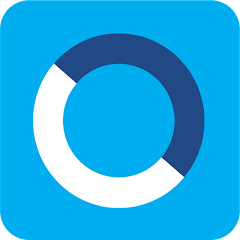

A Cielo é uma empresa de tecnologia e inovação, líder no segmento de pagamentos eletrônicos em toda América Latina, prestando serviços como instituição de pagamento autorizada a funcionar pelo Banco Central do Brasil nas modalidades de credenciador e emissor de moeda eletrônica.

Movimentam os negócios do pequeno empreendedor ao grande varejista, espalhados por todo o país.

Estão ao lado de quem faz acontecer, oferecendo soluções completas que contribuem com as vendas, finanças e gestão dos mais de 1,5 milhão de clientes ativos.

#### **Sobre os dados**

---

Esse estudo estará utilizando 'Web Scraping' para capturar avaliações dos usuários referente ao aplicativo 'Cielo Gestão - Maquininha' na plataforma da 'Google Play Store'.

O conjunto de dados que vamos trabalhar consiste em duas colunas:

**Text:** Comentário do usuário

**Rating:** Nota atribuída ao aplicativo

#### **Objetivo**

---


Com base nas informações dispostas nesse conjunto de dados, irei trabalhar na análise, tratamento, limpeza e transformação do texto com o objetivo de treinar um modelo de machine learning capaz de classificar cada amostra do dataset como uma das seguintes labels: positiva, negativa ou neutra.

<img src="https://media.giphy.com/media/dQpUkK59l5Imxsh8jN/giphy.gif" alt="win" width="600"/>

#### **Web Scraping - Importando nossos dados**

---

O Web scraping (ou raspagem de dados) é uma técnica de extração automática de dados de páginas da web.

O web scraping pode ser usado para diferentes finalidades, especialmente no campo da análise de dados. Muitas empresas de pesquisa de mercado, por exemplo, usam “scrapers” para extrair dados de mídias sociais ou fóruns on-line para analisar o comportamento de clientes. 

Primeiro vamos importar algumas bibliotecas:

In [ ]:
# Extração de dados da Google Play Store
!pip install google_play_scraper
from google_play_scraper import Sort, reviews

# Manipulação de dados
import pandas as pd

# Ignorando warnings
import warnings
warnings.filterwarnings('ignore')

# Importando bibliotecas de visualização
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

# Álgebra Linear
import numpy as np 

# Expressões regulares (Regex)
import re 

Em seguida vamos criar uma função que retorna uma lista de avaliações de um aplicativo na Google Play Store:

In [2]:
'''Criando função chamada 'get_reviews', que recebe um argumento 'app_id' 
e retorna uma lista de avaliações (reviews) de um aplicativo na Google Play Store, em Português.
'''

def get_reviews(app_id):
  result = []

  for score in range(1,6):
    rvws, _ = reviews(app_id, # o ID do aplicativo
                      lang='pt', # Língua das avaliações (reviews), no caso, Português
                      sort=Sort.NEWEST, # Ordem em que as avaliações serão retornadas, neste caso, as mais recentes primeiro
                      count=3000 if score == 3 else 2100, # Qtd de avaliações que serão retornadas, sendo 3000 para avaliações de 3 estrelas e 2100 para as demais avaliações
                      filter_score_with=score)
    
    result.extend(rvws) # Adicionando as avaliações (reviews) obtidas na lista result
  return result

Feito nossa função, agora vamos capturar os comentários do aplicativo 'Cielo Gestão - Maquininha':

In [3]:
# ID do aplicativo da Cielo Gestão - Maquininha
app_id = 'br.com.mobicare.cielo'

# Chamando função 'get_reviews' e salvando na variável 'reviews'
reviews = get_reviews(app_id)

Agora vamos passar nossos dados para um DataFrame:

In [4]:
list_reviews = []

# Loop for que vai percorrer cada avaliação e salvar na 'list_reviews'
for review in reviews:
    text = review['content']
    rating = review['score']
    list_reviews.append({'text': text, 'rating': rating})

# Passando nosso conjunto de dados para um DataFrame
df = pd.DataFrame(list_reviews)

#### **Primeiras impressões do nosso conjunto de dados**

---

Graças ao 'web scraping' conseguimos fazer a captura de dados e agora temos um DataFrame que podemos analisar. Dito isso, bora visualizar as 10 primeiras linhas do nosso conjunto de dados:

In [5]:
#Visualização das 10 primeiras linhas do dataset

df.head(10)

,text,rating
0,"Não ta mais entrando no app, aperta o botao de...",1
1,Minha esposa tenta entrar pra ver suas vendas ...,1
2,Cielo lixo. Não tem transparência nas cobrança...,1
3,"Péssimo, não consigo acessar não consigo recup...",1
4,"Juros de 7,52 no crédito. No começo é bem baix...",1
5,Estou recebendo cobrança todo mês de uma valor...,1
6,"Depois da última atualização, não consigo aces...",1
7,Isso é um absurdo. Quero apenas ver as vendas ...,1
8,"Essa empresa não é idônea, pois há mais de 1 a...",1
9,Gente alguém mais está com falha em autenticaç...,1


Vamos verificar algumas informações do nosso dataset:

In [ ]:
!pip install sweetviz #Instalando biblioteca sweetviz
import sweetviz as sv # Visualização do conjunto de dados

                                             |          | [  0%]   00:00 -> (? left)


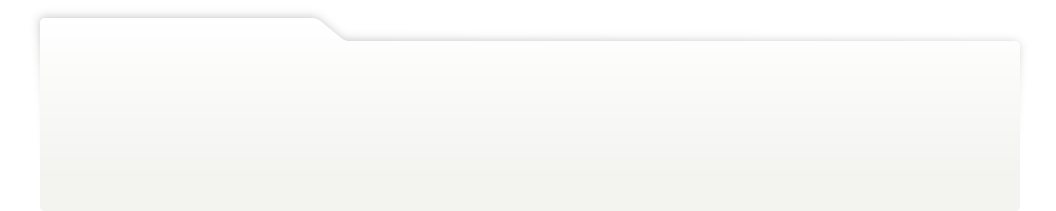
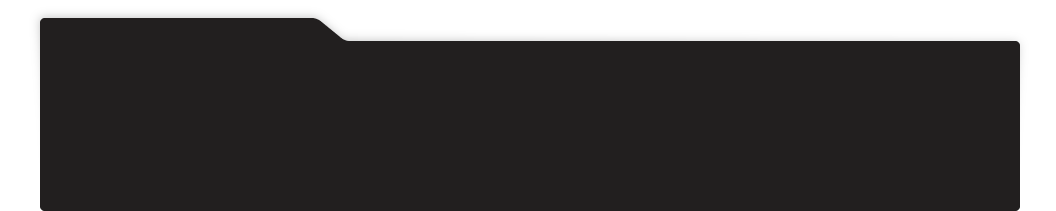
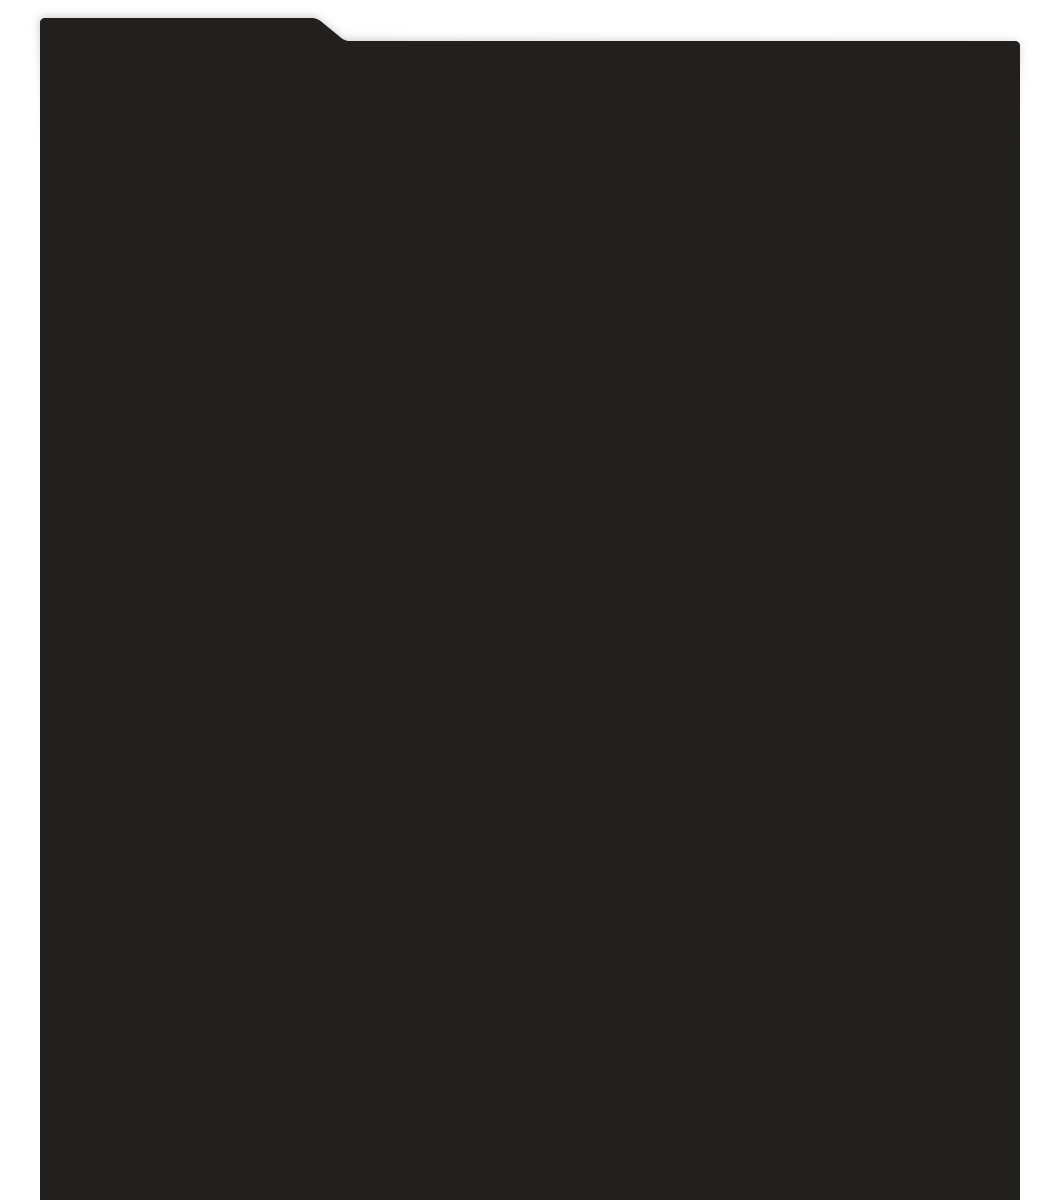
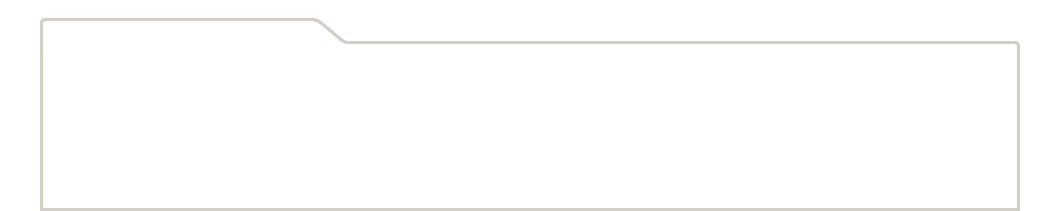
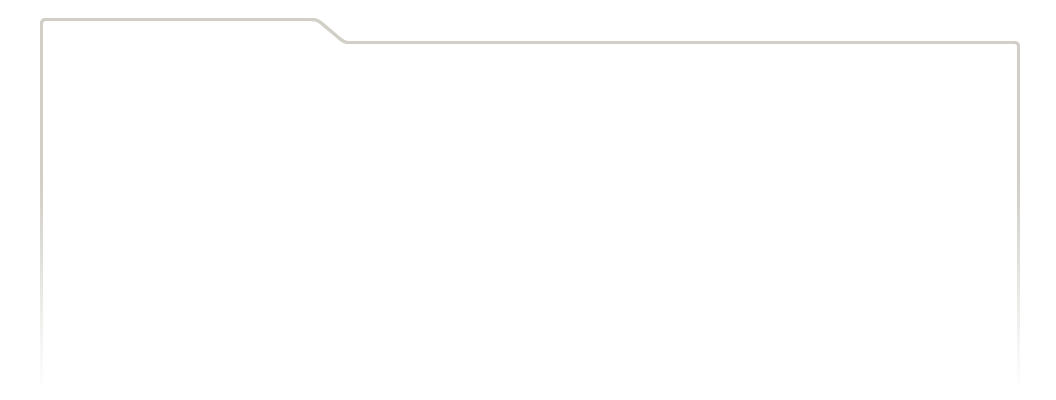
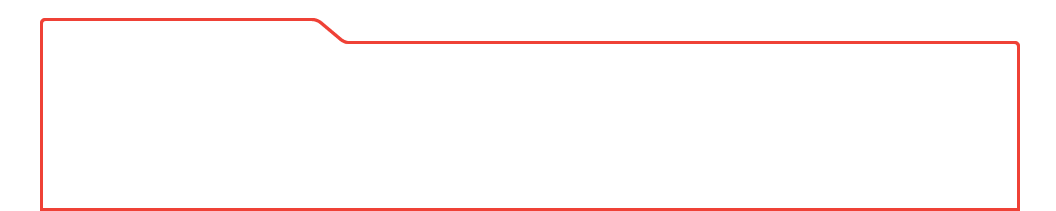
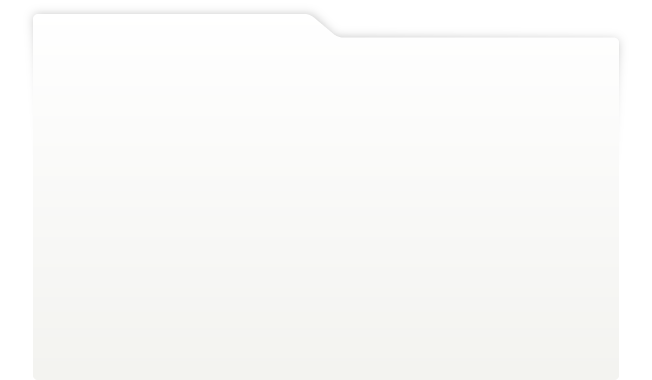
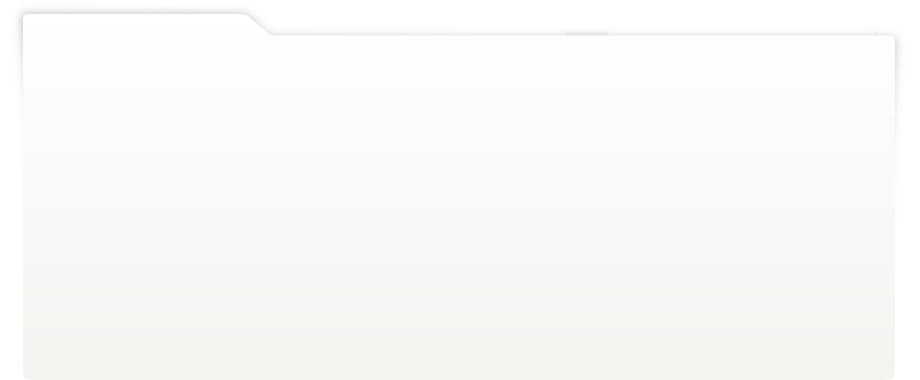
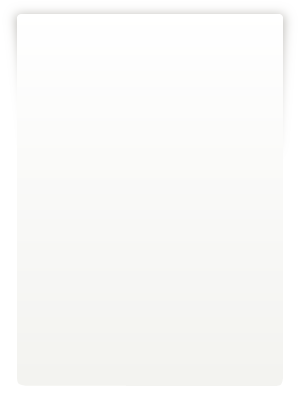
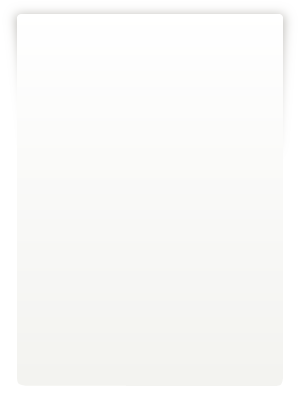
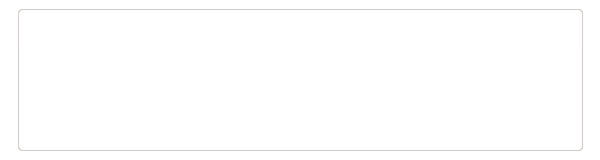
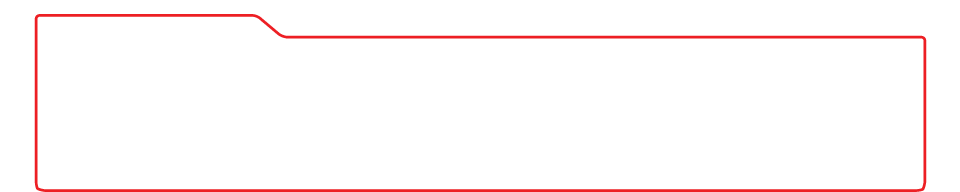
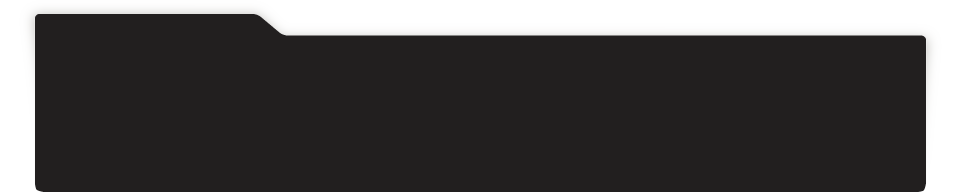
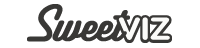
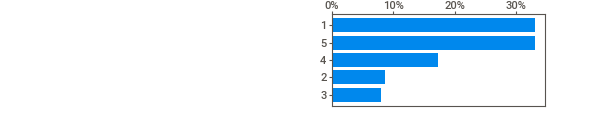
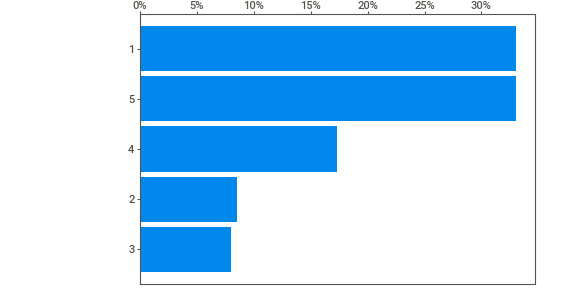
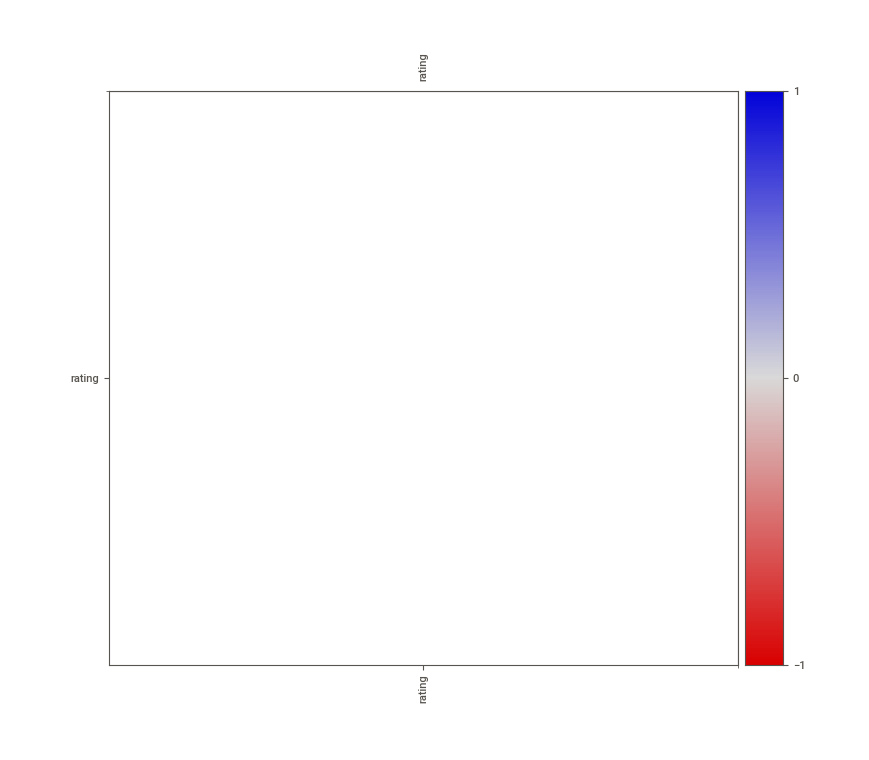
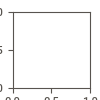

In [7]:
#Sweetviz tem uma função chamada Analyze () que analisa todo o conjunto de dados.

my_report = sv.analyze(df);
my_report.show_notebook();

Até aqui podemos concluir que:
- Nosso conjunto de dados possui 6354 registros 
- Não temos nenhuma linha com valores faltantes (missing)
- Temos 1314 linhas com valores duplicados

Agora vamos analisar a distribuição de 'rating' em nosso conjunto de dados:

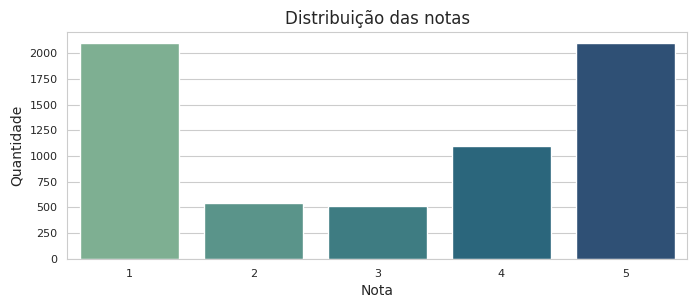

In [8]:
# Distribuição das notas

sns.set_style('whitegrid')
plt.figure(figsize=(8, 3))
sns.countplot(x='rating', data=df, palette='crest');
plt.title("Distribuição das notas");
plt.xlabel("Nota");
plt.ylabel("Quantidade");

Conforme podemos visualizar no gráfico acima, nossa função retornou mais comentários de nota 1 e 5.

#### **Nuvem de palavras**

---

Por curiosidade vamos gerar uma nuvem de palavras!

A nuvem de palavras dependendo do nosso conjunto de dados pode nos dar bons 'insights'. Conseguimos ver logo de cara se os sentimentos nos comentários são bons ou não. 

In [9]:
# Importando biblioteca da Nuvem de palavras

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

In [10]:
# Juntando frases do nosso conjunto de dados
nuvem = " ".join(s for s in df['text']) 

# Salvando palavras que podem ser consideradas irrelevantes na nuvem de palavras na variável 'stopwords'
nltk.download('stopwords')
stopwords = stopwords.words('portuguese') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


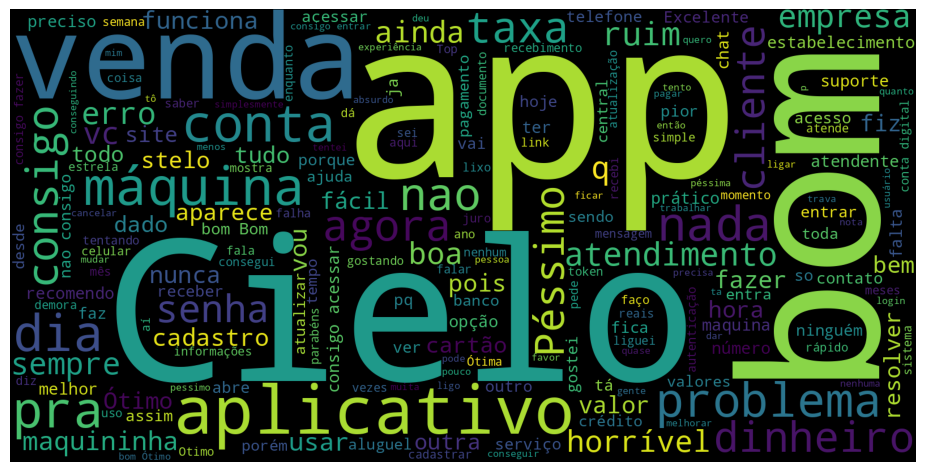

In [11]:
# Plot da nuvem de palavras 

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(nuvem)

fig, ax = plt.subplots(figsize=(25,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);

Como previsto conseguimos ter alguns insight's com a nuvem de palavras, podemos notar o sentimento positivo com o aplicativo através das palavras "bom/ótimo". Ainda assim também temos uma parte que não está tendo uma boa experiência, conseguimos notar através das palavras "péssimo/problema".

<img src="https://media.giphy.com/media/13k4VSc3ngLPUY/giphy.gif" alt="win" width="300"/>

#### **Limpeza e Tratamento**

---

Feito nossa nuvem de palavras, agora vamos ao tratamento e limpeza de texto!

Podemos começar olhando um registro do conjunto de dados e removendo as linhas duplicadas:

In [12]:
# Olhando o registro 

df.text[7]

'Isso é um absurdo. Quero apenas ver as vendas e receber meu relatório para imposto de renda. Querem me obrigar a baixar aplicativo. Mandar fotos etc... Isso fere a lei de proteção de dados. Merecem um processo por coação.'

In [13]:
# Removendo linhas duplicadas
df = df.drop_duplicates()

In [14]:
# Verificando informações do novo dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5040 entries, 0 to 6352
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5040 non-null   object
 1   rating  5040 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.1+ KB


Nossas frases estão com pontuações, números e caracteres especiais, para melhor desempenho do nosso modelo de machine learning vamos realizar uma limpeza e aplicar em nosso conjunto de dados:

In [15]:
# Função 'limpeza' que remove números, pontuações e caracteres especiais

def limpeza(text):
	x = re.compile(r'(<.*?>)|([^a-zA-z]|\[|\]|\_)')
	return re.sub(x, ' ', text)
 
# Aplicando limpeza no conjunto de dados
df.text = df.text.apply(limpeza)

# Visualizando nosso registro limpo
df.text[7]

'Isso   um absurdo  Quero apenas ver as vendas e receber meu relat rio para imposto de renda  Querem me obrigar a baixar aplicativo  Mandar fotos etc    Isso fere a lei de prote  o de dados  Merecem um processo por coa  o '

Agora que conseguimos limpar as pontuações, números e caracteres especiais, vamos deixar nossos textos em "lower_case" (Minúsculo):

In [16]:
# Função 'lower' que deixa todas as letras minúsculas

def lower_case(text):
	return text.lower()
 
# Aplicando lower_case no conjunto de dados
df.text = df.text.apply(lower_case)

# Visualizando nosso registro 
df.text[7] 

'isso   um absurdo  quero apenas ver as vendas e receber meu relat rio para imposto de renda  querem me obrigar a baixar aplicativo  mandar fotos etc    isso fere a lei de prote  o de dados  merecem um processo por coa  o '

A partir daqui vamos entrar na próxima etapa do nosso processamento de linguagem natural, iremos remover as stopwords.

Precisamos somente das palavras que tem algum significado, para isso vamos usar o pacote NLTK. Dentro deste pacote existem as "stopwords" que vão nos auxiliar a remover palavras que podem ser consideradas irrelevantes.

In [17]:
# Pacotes de manipulação de texto

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer 

In [18]:
# download das stopwords

import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Criando função para remover stopwords
def remove_stopwords(text):
	stop_words = set(stopwords.words('portuguese'))
	words = word_tokenize(text) # Tokenização
	return [x for x in words if x not in stop_words]

# Aplicando remove_stopwords no conjunto de dados
df.text = df.text.apply(remove_stopwords)

# Visualizando nosso registro 
df.text[7] 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['absurdo',
 'quero',
 'apenas',
 'ver',
 'vendas',
 'receber',
 'relat',
 'rio',
 'imposto',
 'renda',
 'querem',
 'obrigar',
 'baixar',
 'aplicativo',
 'mandar',
 'fotos',
 'etc',
 'fere',
 'lei',
 'prote',
 'dados',
 'merecem',
 'processo',
 'coa']

In [19]:
# Salvando comentários na 'lista_ngram'

lista_ngram = []
comments = df.text.to_list()

for x in comments:
  lista_ngram.append(" ".join(x))

Para finalizarmos nosso tratamento e limpeza, iremos utilizar um algoritmo de lematização chamado 'SNOWBALL STEMMER'.

Em palavras simples, vamos reduzir uma palavra à sua palavra base ou radical de tal forma que as palavras de tipo semelhante fiquem sob um radical comum (radicalizar):

In [20]:
# Utilizando o SnowballStemmer

def stemmer_txt(text):
	x = SnowballStemmer('portuguese')
	return " ".join([x.stem(w) for w in text])
 
# Aplicando stemmer_txt no conjunto de dados
df.text = df.text.apply(stemmer_txt)

# Visualizando nosso registro 1
df.text[7]

'absurd quer apen ver vend receb relat rio impost rend quer obrig baix aplic mand fot etc fer lei prot dad merec process coa'

<img src="https://media.giphy.com/media/3DnDRfZe2ubQc/giphy.gif" alt="win" width="600"/>

#### **N-gram**

---

N-gram é uma sequência de n elementos de um texto ou fala. Geralmente, os elementos são palavras, mas também podem ser caracteres, fonemas ou sílabas. O valor de n indica o número de elementos que compõem cada n-gram.

Por exemplo, se n = 2 (Bigrama), um n-gram é uma sequência de duas palavras, como "boa tarde" ou "rápido demais". Se n = 3 (Trigrama), um n-gram é uma sequência de três palavras, como "o gato preto" ou "ela está feliz".

Basicamente aqui a ideia é dar peso as palavras ou sequência de palavras mais importantes em nosso conjunto de dados:

**Unigrama**

---

Vamos começar olhando as unigramas:

In [21]:
# Importando biblioteca do CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
# Criando DataFrame das unigramas

co = CountVectorizer(ngram_range=(1,1))
counts = co.fit_transform(lista_ngram)
important_unigrams = pd.DataFrame(counts.sum(axis=0), columns=co.get_feature_names_out()).T.sort_values(0, ascending=False)
important_unigrams

,0
app,1165
cielo,924
consigo,827
aplicativo,801
pra,691
...,...
fszer,1
fucionario,1
fuga,1
fuisiosa,1


**Bigrama**

---

In [24]:
# Criando DataFrame das Bigramas

co = CountVectorizer(ngram_range=(2,2))
counts = co.fit_transform(lista_ngram)
important_unigrams = pd.DataFrame(counts.sum(axis=0), columns=co.get_feature_names_out()).T.sort_values(0, ascending=False)
important_unigrams

,0
horr vel,203
consigo acessar,130
pr tico,117
nao consigo,103
informa es,89
...,...
enviando transacao,1
enviando clientes,1
enviando arquivo,1
enviando amail,1


**Trigrama**

---

In [91]:
# Criando DataFrame das Trigramas

co = CountVectorizer(ngram_range=(3,3))
counts = co.fit_transform(lista_ngram)
important_unigrams = pd.DataFrame(counts.sum(axis=0), columns=co.get_feature_names_out()).T.sort_values(0, ascending=False)
important_unigrams

,0
domic lio banc,28
lio banc rio,28
nao consigo acessar,27
consigo acessar app,26
fazer transfer ncia,24
...,...
direitos pois est,1
diretamente cielo novamente,1
direto aparece mensagem,1
direto apresenta erro,1


Analizando as n-gram conseguimos notar que nosso trabalho de tokenização acabou cortando algumas palavras, ainda assim conseguimos tirar algumas conclusões:

- As chances de acontecer um elogio do usuário são maiores na unigrama (quando o usuário escreve uma palavra), encontramos a palavra "bom" no top 6 do rank, complementando e confirmando o que já tínhamos visto através da nuvem de palavras.

- Nas Bigramas e Trigramas já conseguimos encontrar usuários que não estão tendo uma boa experiência no aplicativo, ou seja, quanto mais o usuário escreve a tendência é que seja um sentimento negativo. Aqui o destaque fica em frases do tipo: "não consegue acessar o aplicativo", "falha de autenticação", "difícil acesso e atendimento".

Neste ponto penso que vale uma investigação para saber o que está havendo, pois o usuário não está conseguindo acessar a plataforma ou está tendo dificuldades. E também um plano de ação, para melhorar a experiência desses usuários.

#### **Machine Learning**

---

Agora que já tiramos as primeiras impressões do dataset e já realizamos a limpeza e tratamento do texto, vamos implementar um modelo de Machine Learning capaz de **classificar** os sentimentos de cada amostra do dataset como: positivo, negativo ou neutro. 

Primeiro de tudo vamos criar uma coluna chamada 'TARGET' na qual vamos aplicar a seguinte regra (Agrupamento):

- Rating 1 e 2 = Negativo

- Rating 3 = Neutro

- Rating 4 e 5 = Positivo

In [26]:
# Criando função 'target' que vai nos ajudar a implementar a regra no dataset

def target(x):
  if x == 4 or x == 5:
    return 'Positivo'
  elif x == 3:
    return 'Neutro'
  else:
    return 'Negativo'

In [27]:
# Criando a nossa nova coluna "TARGET" no dataset 'df' e aplicando nossas regras

df['TARGET'] = df['rating'].apply(target)

In [28]:
# Visualização do dataset

df

,text,rating,TARGET
0,n ta entrand app apert bota entrar nad acontec,1,Negativo
1,espos tent entrar pra ver vend app ped atualiz...,1,Negativo
2,ciel lix n transp nci cobran men valor receb m...,1,Negativo
3,p ssim n consig acess n consig recuper senh mu...,1,Negativo
4,jur cr dit com bem baix arranc m xim,1,Negativo
...,...,...,...
6348,oaplic bom tax jur alta,5,Positivo
6349,bom pr tic,5,Positivo
6350,otim vou ver pra mim,5,Positivo
6351,top excelent app,5,Positivo


Feito nossa nova coluna, vamos dar uma olhada na nossa nova distribuição de sentimentos:

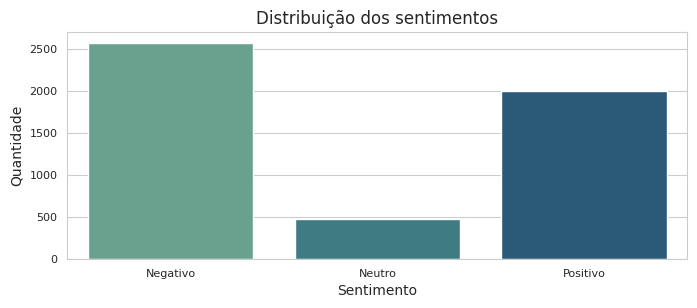

In [29]:
# Distribuição dos sentimentos

sns.set_style('whitegrid')
plt.figure(figsize=(8, 3))
sns.countplot(x='TARGET', data=df, palette='crest');
plt.title("Distribuição dos sentimentos");
plt.xlabel("Sentimento");
plt.ylabel("Quantidade");

In [30]:
df.TARGET.value_counts()

Negativo    2572
Positivo    1997
Neutro       471
Name: TARGET, dtype: int64

Removendo as linhas duplicadas e agrupando nossos dados tivemos a seguinte distribuição:

- 51,03% Representam sentimentos negativos
- 39,64% Representam sentimentos positivos
- 9,33% Representam sentimentos neutros


*Normalização dos dados*

---

Para conseguirmos criar nosso modelo de machine learning precisamos converter nosso texto em dados numéricos. Para isso vamos utilizar o método 'CountVectorizer'. Ele é usado para transformar um determinado texto em um vetor com base na frequência (contagem) de cada palavra que ocorre em todo o texto:

In [31]:
# Definindo variáveis e aplicando CountVectorizer na variável 'X'

x = np.array(df.iloc[:,0].values) # Comentários
y = np.array(df.TARGET.values) # Alvo
cv = CountVectorizer(max_features = 1000)
X = cv.fit_transform(df.text).toarray() # Vetores

*Divisão treino e teste*

---

Feito nossos vetores, precisamos dividir nossos dados em dois conjuntos:

Dados que serão apresentados ao algoritmo para treinar um modelo (Treino)
Dados que serão apresentados ao modelo após a sua criação para simular previsões reais (Teste):

In [32]:
# Importando método para divisão treino e teste do nosso conjunto de dados

from sklearn.model_selection import train_test_split

In [33]:
# Inicializando método e pegando 30% do conjunto de dados para teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

*Lazy Predict’s*

---

Esse estudo irá utilizar a lib 'Lazy Predict' para auxiliar na escolha de um algoritmo de classificação. Essa biblioteca ajuda a construir muitos modelos básicos sem muito código e ajuda a entender quais modelos funcionam melhor sem nenhum ajuste de parâmetro.

Dito isto, mãos a obra:

In [ ]:
# Instalando biblioteca
!pip install lazypredict

# Importando LazyClassifier (Algoritmos de classificação)
from lazypredict.Supervised import LazyClassifier

In [35]:
# Chamando método 'LazyClassifier' e passando dados de treino e teste

clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [01:29<00:00,  3.10s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.80,0.63,None,0.78,1.86
ExtraTreesClassifier,0.79,0.60,None,0.76,2.43
RandomForestClassifier,0.79,0.60,None,0.76,1.48
NearestCentroid,0.67,0.59,None,0.67,0.15
AdaBoostClassifier,0.76,0.59,None,0.73,1.99
LinearDiscriminantAnalysis,0.73,0.58,None,0.73,1.87
SVC,0.78,0.58,None,0.75,6.69
BernoulliNB,0.72,0.58,None,0.71,0.17
RidgeClassifierCV,0.75,0.58,None,0.73,1.36


Graças a biblioteca 'lazypredict' conseguimos uma tabela com os principais algoritmos de classificação rankeados do que melhor se adaptou ao nosso conjunto de dados ao pior sem ajuda de hiperparâmetros.

Desta forma, vou utilizar o algoritmo **'LGBMClassifier'** para este estudo. Ele apresentou de primeiro momento uma acurácia de 80% e o f1-score de 78%.

*Otimização de hiperparâmetros - Bayesian Optimization*

---

A ideia de usar a lib do 'lazypredict' era escolher um algoritmo inicial pra depois otimizar os parâmetros do mesmo. Nosso algoritmo escolhido foi o 'LGBMClassifier', então bora encontrar a melhor combinação de parâmetros.

Primeiro vamos começar importando a lib do nosso algoritmo e algumas métricas de avaliação:

In [ ]:
# Importando nosso algoritmo
from lightgbm import LGBMClassifier

# Importando métricas de avaliação
!pip install scikit-optimize
from skopt import gp_minimize
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score

Para tunar nosso modelo vamos utilizar a **Otimização Bayesiana**. É uma abordagem que utiliza o Teorema de Bayes para direcionar a busca a fim de encontrar o mínimo ou máximo de uma função objetivo.

O intuito aqui é ela nos dar a melhor combinação entre os seguintes parâmetros:
- **learning_rate:** Taxa de aprendizado do modelo. É o tamanho do passo que o modelo da durante o processo de otimização
- **num_leaves:** Controla o número de árvores de decisão
- **min_child_samples:** Número mínimo de amostras necessárias para dividir um nó em uma árvore
- **subsample:** Fração de amostras a serem usadas para treinar cada árvore.
- **colsample_bytree:** Fração de colunas a serem usadas para treinar cada árvore
- **max_depth:** Profundidade máxima de uma árvore

In [53]:
# Criando a função que vai realizar a Otimização Bayesiana e encontrar os melhores parâmetros para nosso modelo
def treinar_modelo(params):
    learning_rate = params[0]
    num_leaves = params[1]
    min_child_samples = params[2]
    subsample = params[3]
    colsample_bytree = params[4]
    max_depth = params[5]
    
    lgb_model = LGBMClassifier(learning_rate=learning_rate, num_leaves=num_leaves, min_child_samples=min_child_samples, 
                                       subsample=subsample, colsample_bytree=colsample_bytree, 
                                       max_depth=max_depth, random_state=0, n_estimators=100)
    lgb_model.fit(X_train, y_train)
    
    pip = lgb_model.predict_proba(X_test)[:]
    
    return -roc_auc_score(y_test, pip,multi_class='ovo');


# Parâmetros
space = [(1e-3, 1e-1, 'log-uniform'), #learning rate
         (2, 3000), # num_leaves
         (1, 100), # min_child_samples
         (0.05, 1.0), # subsample
         (0.1, 1.0), # colsample bytree
         (3,64)] # max_depth


# Chamando a função 'treinar_modelo' e atribuindo na variável 'resultado'
resultado = gp_minimize(treinar_modelo, space, random_state=0, verbose=1, n_calls=100);

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.4049
Function value obtained: -0.7750
Current minimum: -0.7750
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.8243
Function value obtained: -0.7857
Current minimum: -0.7857
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.8979
Function value obtained: -0.7907
Current minimum: -0.7907
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.7727
Function value obtained: -0.7754
Current minimum: -0.7907
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.4299
Function value obtained: -0.7889
Current minimum: -0.7907
Iteration No: 6 started. 

Finalizada a Otimização Bayesiana, vamos descobrir qual o melhor grupo de parâmetros que foi encontrado:

In [54]:
'''
Lembrando que nossos parâmetros estão na seguinte ordem:
learning_rate = params[0]
    num_leaves = params[1]
    min_child_samples = params[2]
    subsample = params[3]
    colsample_bytree = params[4]
    max_depth = params[5]

'''
resultado.x

[0.07158119121457607, 2034, 16, 1.0, 0.1, 64]

*Modelo LGBMClassifier*

---

Agora que achamos nossos parâmetros ideais vamos realizar um novo treinamento com eles:

In [58]:
# Inicializando modelo na variável 'model'
model = LGBMClassifier(learning_rate=0.1, 
                       num_leaves=20, 
                       min_child_samples=14, 
                       subsample=0.54, 
                       colsample_bytree=0.51, 
                       max_depth=12,
                       n_estimators=100, 
                       random_state=0)

# Treinando modelo
model.fit(X_train, y_train)

# Passando nossas predições pra variável 'pred'
pred = model.predict(X_test)

In [65]:
# Salvando modelo
import pickle

with open("LGBMClassifier.pkl", "wb") as arquivo:
	pickle.dump(model, arquivo)

*Avaliação do modelo*

---

Agora que temos nosso modelo treinado com os hiperparâmetros vamos avaliar os resultados.

Umas das métricas de avaliação é a "Acurácia", ela diz o quanto o modelo acertou de acordo com as previsões possíveis:

In [60]:
# Acurácia

acc = accuracy_score(y_test,pred)
print("Acurácia do modelo = %2.f%%" % (acc *100.00))

Acurácia do modelo = 80%


Dentre as bibliotecas que importamos existe o "relatório de classificação", nele somos apresentados a mais 3 métricas, são elas:

- *Recall/Sensibilidade*: Medida que nos mostra o quão bom o modelo é para prever/detectar positivos
- *Precisão*: Medida que nos ajuda a responder a seguinte pergunta: Dos classificados como positivos, quantos são realmente positivos?
- *f1-score:* Nos mostra o balanço entre a precisão e o recall de nosso modelo, quanto mais próximo de 1 melhor

In [61]:
# Criando relatório de classificação 

report_df = pd.DataFrame(classification_report(y_test,pred, output_dict=True)). T
report_df = report_df.drop(columns=['support'])

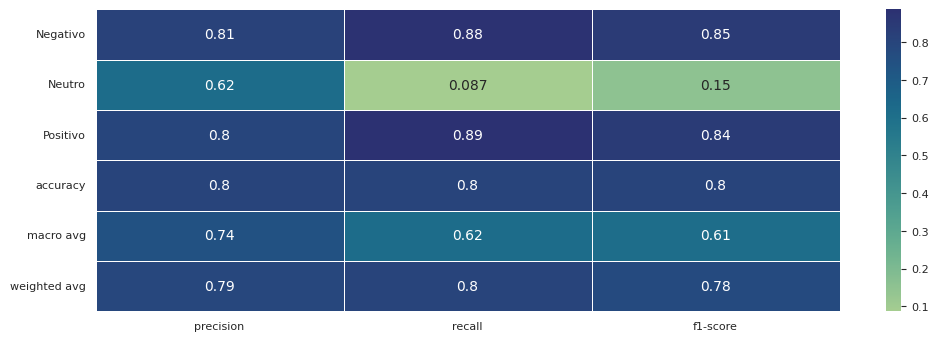

In [62]:
# Plotagem do relatório de classificação 

plt.subplots(figsize=(12,4))
sns.heatmap(report_df, cmap='crest', linecolor='white',linewidths=0.5,annot=True);

Por último e não menos importante, também temos a "matriz de confusão". Ela é uma tabela que mostra as frequências de classificação para cada classe do nosso modelo:

In [63]:
# Criando a matriz de confusão 

cnf_report_df = report_df.index[:-3]
cnf_matrix = confusion_matrix(y_test,pred)
cnf_matrix = pd.DataFrame(cnf_matrix, index = cnf_report_df.values, columns = cnf_report_df.values)
cnf_matrix = cnf_matrix/cnf_matrix.sum(axis=1)[:, np.newaxis] # Normalização em linha (recall)

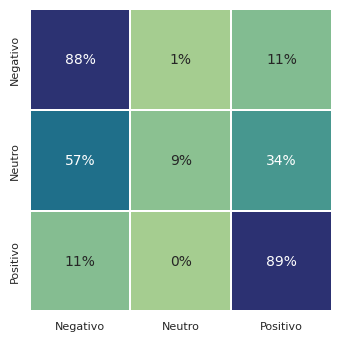

In [64]:
# Plotagem da matriz de confusão 

sns.heatmap(cnf_matrix, cmap='crest', linecolor='white', linewidths=0.3, annot=True, fmt='.0%', cbar=False, square=True);

Conclusões após a utilização dos hiperparâmetros:
- Nossa acurácia se manteve em 80%
- Nosso relatório de classificação mostra que o f1-score (média ponderada) também se manteve em 78%
- Matriz de confunsão mostra que nosso modelo possui extrema facilidade de encontrar sentimentos negativos/positivos e muita dificuldade em classificar neutros.

Confesso que esperava mais otimizando os hiperparâmetros, nosso modelo continua apresentando o mesmo resultado em termos de acurácia, mas **vale algumas ressalvas que ficarão para estudos posteriores:**

- Será que nosso modelo ficou ruim? A maior dificuldade e o que levou nossa acurácia lá pra baixo foram as classificações de sentimentos neutros, mas conhecendo o usuário muitos podem dar 3 estrelas e fazer um comentário tanto positivo, quanto negativo! Vale uma análise apartada sobre esses usuários
- Avaliar a performance do modelo em diferentes subconjuntos de dados e comparar a performance no conjunto de treinamento e no conjunto de validação
- Vale o estudo com mais amostras para treinar um modelo mais robusto
- A implementação de outros algoritmos com a utilização de hiperparâmetros também é válida, uma rede neural seria interessante

Tendo em vista esses pontos penso que tivemos um modelo "ok" para fins de estudos. Em cenários do mundo real precisamos utilizar muito mais dados e conforme dito nas ressalvas, realizar várias outras análises para deixar o modelo adequado para as classificações.

<img src="https://media.giphy.com/media/3o752ogcifnC3MECt2/giphy.gif" alt="win" width="500"/>

Finalizado nosso modelo de machine learning, vamos criar uma função que vai nos auxiliar a classificar sentimentos de **novas** frases:

In [66]:
# Criando função model

def model(text):

  # Limpeza e tratamento de texto
  f1 = limpeza(text)
  f2 = lower_case(f1)
  f3 = remove_stopwords(f2)
  f4 = stemmer_txt(f3)

  # Vocabulário do countvectorizer
  word_dict = cv.vocabulary_

  ll = []
  for i in word_dict:
    ll.append(f4.count(i[0]))

  # Carregando nosso modelo já treinado e retornando a previsão 
  with open("LGBMClassifier.pkl", "rb") as arquivo:
	  modelo = pickle.load(arquivo)
  return modelo.predict(np.array(ll).reshape(1,1000))

In [95]:
# Criando variável 'frase' (Aqui pode ser qualquer frase)
frase = '''app horrível'''

# Chamando nossa função e classificando sentimento da frase nova
model(frase)

array(['Negativo'], dtype=object)

#### **Conclusão**

---

Através deste estudo, quis trazer ao conhecimento como implementar análise de sentimentos de comentários na Google Play Store, a fim de deixar o entendimento mais transparente e direto. Algo que também está no escopo deste estudo foi a captura de dados (Web Scraping), criação de uma nuvem de palavras, unigramas, bigramas, trigramas e a criação de um modelo de machine learning, passando por processos de transformação de dados, limpeza, avaliação e por fim a submissão do nosso modelo em dados de teste (Frases Novas).

Obviamente, como todos os estudos, este não é uma exceção e poderá ser sempre refinado, ainda assim, este sempre estará aberto para novas ideias, feedbacks e ferramentas a serem implementadas.

Um dos principais resultados que obtivemos aqui foi a criação do nosso modelo de machine learning. Se pensarmos só em 'estudos' conseguimos criar um bom modelo com 80% de assertividade, mas para o mundo real eu não recomendaria ainda ir para o ambiente de produção. Claramente tivemos um problema na classificação de sentimentos 'neutro', isso muito provavelmente porque o usuário da 3 estrelas e faz um comentário negativo ou positivo, desta forma acaba afetando de forma direta nosso modelo de machine learning, por este motivo seria recomendável um estudo mais aprofundado com outros algoritmos, métodos e análises para classificar melhor sentimentos 'positivos', 'negativos' e 'neutros'.
Outro resultado importante que obtivemos foi em relação a experiência do usuário, conseguimos identificar através das n-grams que uma grande parcela de usuários tem dificuldades de acessar o app, penso que vale um plano de ação para entender o que acontece com esses usuários e o que pode ser feito para melhorar. 